In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#импорт библиотек

In [ ]:
ca = pd.read_csv('the_unlimited_power.csv')
ca.head(4000)



,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex;;
0,ID 115709096,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6,6,1,20.7,...,-1,18 м²,1 м²,79175096253,3 м,Серпухов,Крюкова,4,NaN,;;
1,"Самолёт плюс Подмосковье Серпухов,real_estate_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID 3246838,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4,4,1,14.0,...,-1,-1,-1,79807126116,-1,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,;;
3,ID 64398571,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5,5,1,17.5,...,-1,-1,-1,79645652380,-1,Серпухов,Российская,40,NaN,;;
4,"ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Максим Юсов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/304233768/,Серпухов,sale,flat,2,3,1,46.7,...,-1,25 м²,6 м²,79647820594,-1,Серпухов,2-я Московская,6к3,NaN,;;
6,ID 9655060,unknown,https://serpukhov.cian.ru/sale/flat/304697154/,Серпухов,sale,flat,3,5,1,29.0,...,-1,25 м²,-1,79645658245,3 м,Серпухов,Форсса,10,NaN,;;
7,Этажи Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/304332318/,Серпухов,sale,flat,3,6,1,19.1,...,-1,-1,-1,79647821411,-1,Серпухов,Крюкова,4,NaN,;;
8,"Ольга Протченко,realtor,https://serpukhov.cian...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Глеб Маслов,realtor,https://serpukhov.cian.ru/...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
ca.drop(['deal_type', 'author_type', 'url', 'author', 'accommodation_type', 'house_number', 'phone', 'heating_type', 'finish_type', 'have_loggia', 'house_material_type', 'ceiling_height', 'floors_count'], axis=1, inplace=True)
ca.replace('-1', np.nan, inplace=True)
ca.head(8)


#Большинство удалённых данных не нужны для обучения машины, поэтому сразу же удалены. Относительно высоты потолка(ceiling_height) сделан вывод, что она указывается меньше чем в 50% объявлений, а так же практически никак не влияет на цену за метр квадратный.

,location,floor,rooms_count,total_meters,price,year_of_construction,object_type,parking_type,living_meters,kitchen_meters,district,street,underground,residential_complex;;
0,Серпухов,6,1,20.7,2350000,1917,Вторичка,Наземная,18 м²,1 м²,Серпухов,Крюкова,NaN,;;
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Серпухов,4,1,14.0,1700000,NaN,Вторичка,NaN,NaN,NaN,Красный Текстильщик мкр,Красный Текстильщик,NaN,;;
3,Серпухов,5,1,17.5,2500000,1968,Вторичка,NaN,NaN,NaN,Серпухов,Российская,NaN,;;
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Серпухов,2,1,46.7,6599999,NaN,Вторичка,NaN,25 м²,6 м²,Серпухов,2-я Московская,NaN,;;
6,Серпухов,3,1,29.0,3350000,1917,Вторичка,Наземная,25 м²,NaN,Серпухов,Форсса,NaN,;;
7,Серпухов,3,1,19.1,3600000,1917,Вторичка,NaN,NaN,NaN,Серпухов,Крюкова,NaN,;;


In [114]:
ca = ca.drop_duplicates()

#снос дубликатов

In [115]:
ca.shape

#подсчёт строчек и колонок

(1608, 14)

In [116]:
ca.info()

#информация о дата-сете, без лишних данных

<class 'pandas.core.frame.DataFrame'>
Index: 1608 entries, 0 to 7907
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   location               1607 non-null   object
 1   floor                  1606 non-null   object
 2   rooms_count            1577 non-null   object
 3   total_meters           1606 non-null   object
 4   price                  1606 non-null   object
 5   year_of_construction   1017 non-null   object
 6   object_type            1606 non-null   object
 7   parking_type           776 non-null    object
 8   living_meters          1032 non-null   object
 9   kitchen_meters         1242 non-null   object
 10  district               774 non-null    object
 11  street                 1400 non-null   object
 12  underground            971 non-null    object
 13  residential_complex;;  1606 non-null   object
dtypes: object(14)
memory usage: 188.4+ KB


<Axes: >

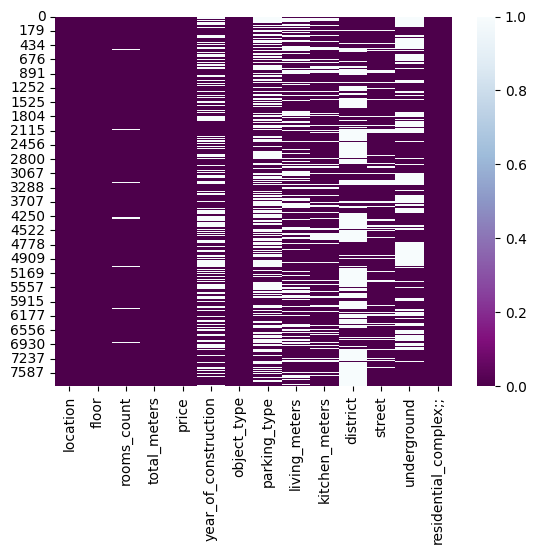

In [117]:
sns.heatmap(ca.isnull(), cmap='BuPu_r')

#в district(районе) подозрительно много пропусков, как и в underground(метро) с street(улица)

In [118]:
null_counts_cian = ca.isnull().sum().reset_index()
null_counts_cian.columns = ['Column', 'Null Count']

print(null_counts_cian)

#подсчитываем отсутствующие значения

                   Column  Null Count
0                location           1
1                   floor           2
2             rooms_count          31
3            total_meters           2
4                   price           2
5    year_of_construction         591
6             object_type           2
7            parking_type         832
8           living_meters         576
9          kitchen_meters         366
10               district         834
11                 street         208
12            underground         637
13  residential_complex;;           2


In [119]:
ca['district'] = ca['district'].fillna(ca['location'])
ca['street'] = ca['street'].fillna(ca['district'])
ca['parking_type'] = ca['parking_type'].fillna(ca['street'])
ca['underground'] = ca['underground'].fillna(ca['street'])
ca = ca.drop(index=1)

columns_to_check = ['location', 'floor', 'total_meters', 'price', 'rooms_count', 'object_type', 'rooms_count']
ca_cleaned = ca.dropna(subset=columns_to_check)

#убираем пропуски у самых проблемых, при помощи замен значений и чистки

In [120]:
null_counts_cian = ca.isnull().sum().reset_index()
null_counts_cian.columns = ['Column', 'Null Count']

print(null_counts_cian)

#аномалия кода. строки со значениями NaN в rooms_count не удаляются

                   Column  Null Count
0                location           0
1                   floor           1
2             rooms_count          30
3            total_meters           1
4                   price           1
5    year_of_construction         590
6             object_type           1
7            parking_type           0
8           living_meters         575
9          kitchen_meters         365
10               district           0
11                 street           0
12            underground           0
13  residential_complex;;           1


<Axes: >

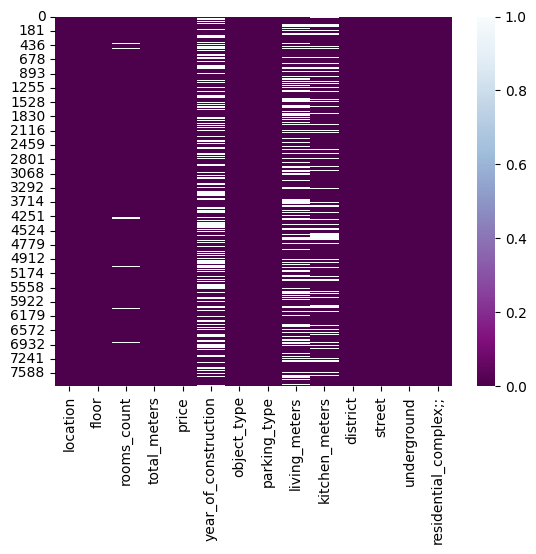

In [121]:
sns.heatmap(ca.isnull(), cmap='BuPu_r')

#эта аномалия сильно всё портит